In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Understanding the data
# Histograms and boxplots
# Value counts
# Missing data
# Correlation between the metrics
# Explore interesting themes
    # Wealthy survive
    # By location
    # Age scatterplot with ticket price
    # Young and wealthy variable
    # total spent
# Feature Engineering
# Preprocess data together or use a transformer
    # Use label for train and test
# Sclaing
# Model baseline
# Model comparision with CV

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

training = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

training.head()
training["train_test"]=1
test["train_test"]=0
test["Survived"] = np.NaN
all_data = pd.concat([training, test])
%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [4]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [7]:
# Split the data into numeric variable and categorical variables
df_num = training[["Age", "SibSp", "Parch", "Fare"]]
df_cat = training[["Survived", "Pclass", "Sex", "Ticket", "Cabin", "Embarked"]]

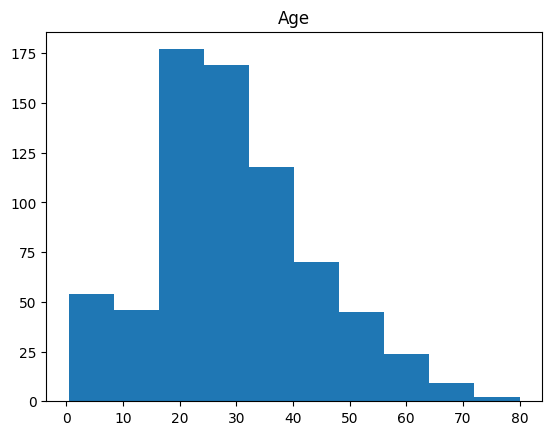

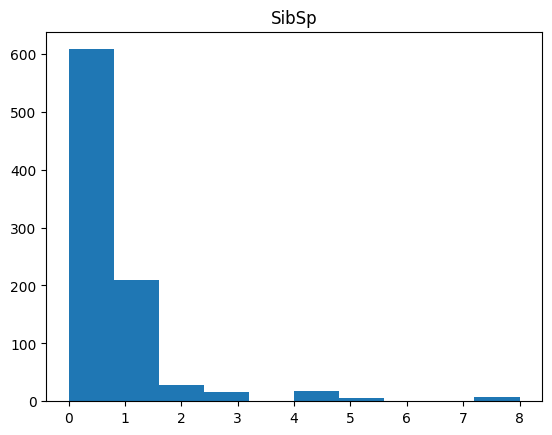

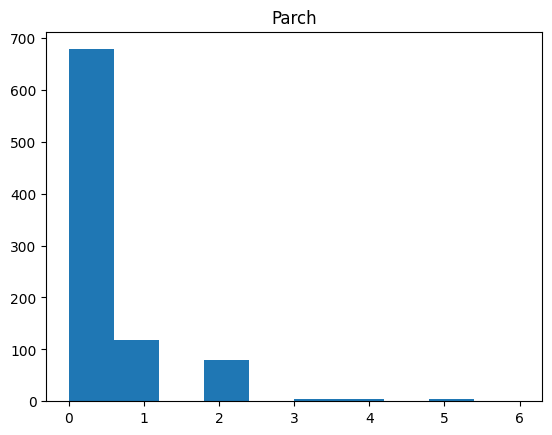

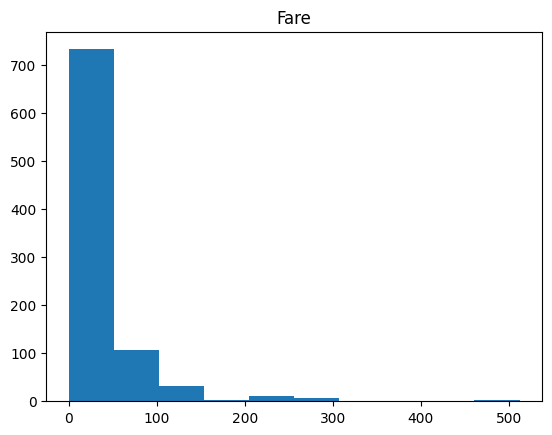

In [8]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

####  Data Exploration
1. For numerical data:
- Histograms to understand the distributions
- Corrplot
- Pivot table comparing survival rate across numeric variables

2. Categorical data
- Frequency.count plots to understand the distribution
- Made pivot table to understand thhe relationship with survival

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

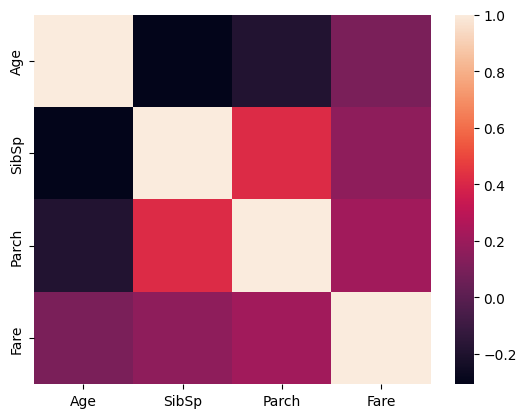

In [9]:
print(df_num.corr())
sns.heatmap(df_num.corr())

We can consider removing the highly negatively or strongly positive correlated features if we were solving regression problem

In [10]:
pd.pivot_table(training, index='Survived', values=["Age","SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


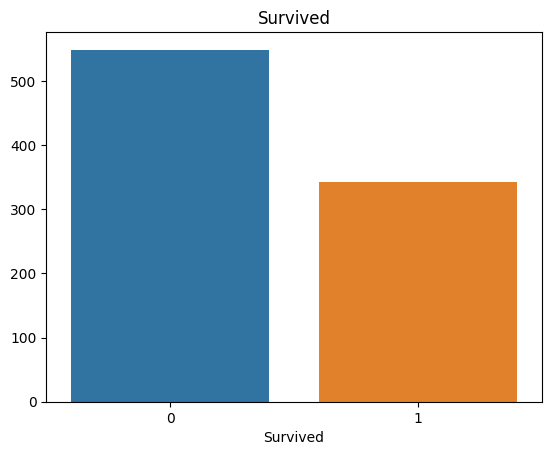

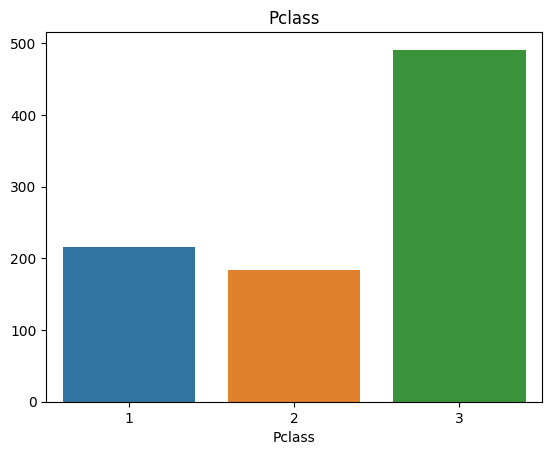

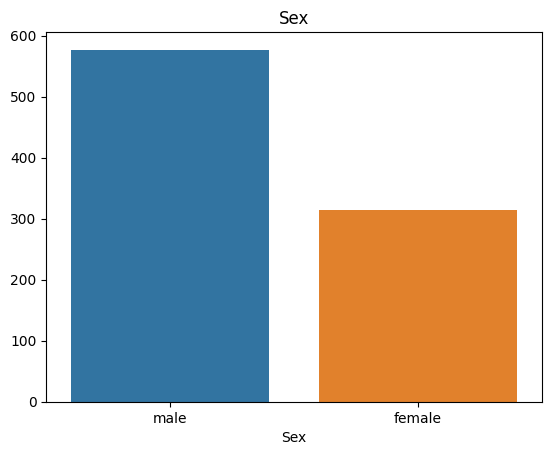

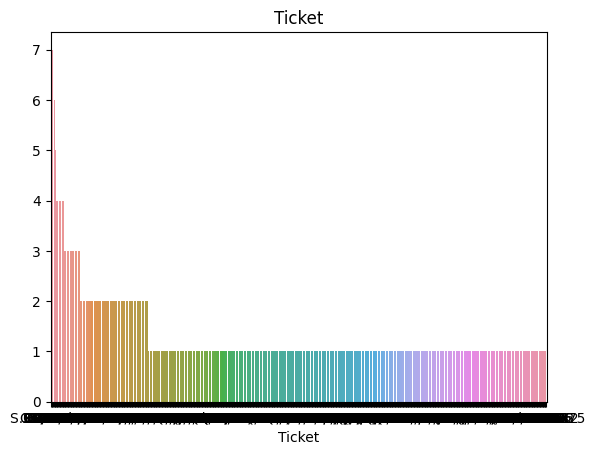

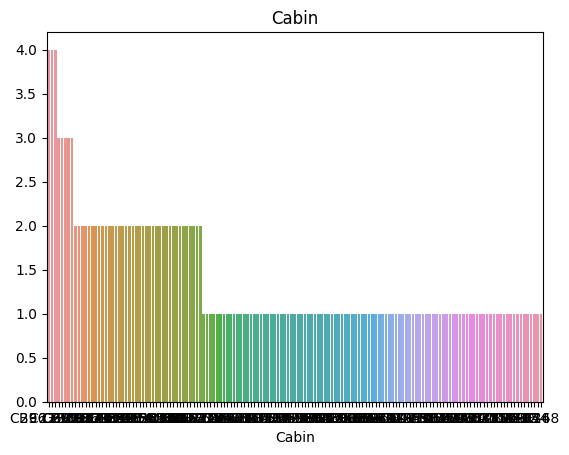

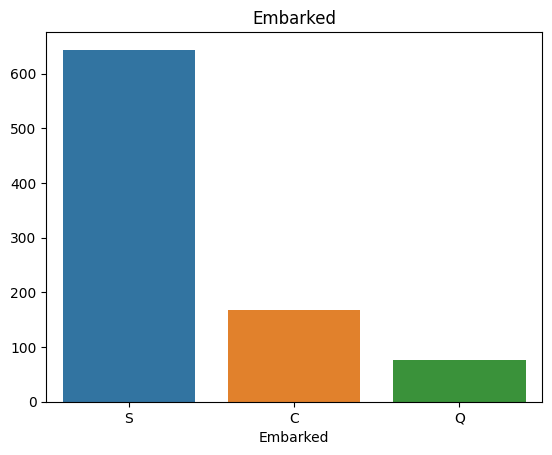

In [11]:
for i in df_cat.columns:
    sns.barplot(x = df_cat[i].value_counts().index, y=df_cat[i].value_counts().values).set_title(i)
    plt.show()

In [12]:
training[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1


In [13]:
df_cat[i].value_counts().index

Index(['S', 'C', 'Q'], dtype='object', name='Embarked')

In [14]:
print("Number of unique values in each column")
for col_name in training.columns:
    print(f"{col_name}: {training[col_name].nunique()}")

Number of unique values in each column
PassengerId: 891
Survived: 2
Pclass: 3
Name: 891
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Ticket: 681
Fare: 248
Cabin: 147
Embarked: 3
train_test: 1


In [15]:
# Comparing survival and each of these categorical variables
display(pd.pivot_table(training, index="Survived", columns="Pclass", values="Ticket", aggfunc="count"))
print()
display(pd.pivot_table(training, index="Survived", columns="Sex", values="Ticket", aggfunc="count"))
print()
display(pd.pivot_table(training, index="Survived", columns = "Embarked", values="Ticket", aggfunc="count"))

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Sex,female,male
Survived,,
0,81,468
1,233,109


Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [16]:
training["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Feature Engineering
1. We can split the cabin columnb or the purchase of tickets across multiple cabins to see if they have any correlation with survival rate
2. Do different ticket types influence survival rate?
3. Does a person's title influence the surival rate

In [17]:
df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
display(training[10:20])
print(training["cabin_multiple"].value_counts())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,1
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,1,0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,1,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,1,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,1,0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,1,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,1,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,0


cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64


In [18]:
pd.pivot_table(training, index="Survived", columns="cabin_multiple", values="Ticket", aggfunc="count")

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [19]:
training["cabin_adv"] = training.Cabin.apply(lambda x: str(x)[0])
print(training.cabin_adv.value_counts())
pd.pivot_table(training, index="Survived", columns="cabin_adv", values="Name", aggfunc="count")

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [20]:
# Create cabin based on the cabin letter (n stands for null)
# in this case we will treat null values 

training["numeric_ticket"] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training["ticket_letters"] = training.Ticket.apply(lambda x: 1 if x.isalpha() else 0)
training['numeric_ticket'].value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [21]:
pd.pivot_table(training, index="Survived", columns="numeric_ticket", values="Ticket", aggfunc="count")

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


### Data Preprocessing for Model

In [22]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train_test        0
dtype: int64

(889,)

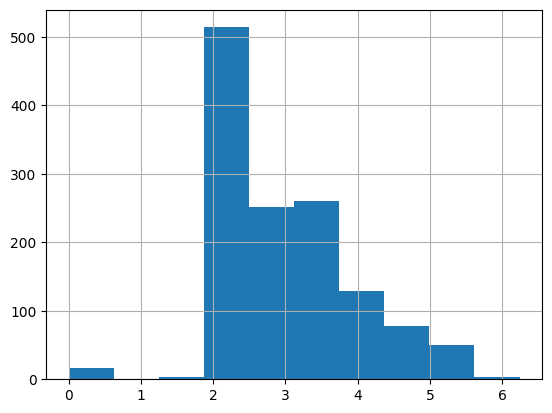

In [23]:
all_data["cabin_multiple"] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data["cabin_adv"] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data["numeric_ticket"] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data["ticket_letters"] = all_data.Ticket.apply(lambda x: 1 if x.isalpha() else 0)

# Missing value imputation
all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

# Deleting the two rows which have null in embarked column
all_data.dropna(subset=["Embarked"], inplace=True)

# A data transformation is the process of using a math expression to change the structure of our data. 
# As we mentioned before, some models need data to fit a specific type of distribution for them to produce optimal results. 
# Unfortunately, the data we get in the real world, doesn’t always fit the distributions our models call for.
# Let's look at the shape of our data and if it has any outliers before we do our transforms

all_data["norm_fare"] = np.log(all_data.Fare+1)
all_data["norm_fare"].hist()

all_dummies=pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','Embarked','cabin_adv','cabin_multiple','numeric_ticket','train_test']])

# Split to train test again
X_train = all_dummies[all_dummies["train_test"]==1].drop("train_test", axis=1)
X_test = all_dummies[all_dummies["train_test"]==0].drop("train_test", axis=1)

y_train = all_data[all_data.train_test==1].Survived
y_train.shape

In [24]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[["Age", "SibSp", "Parch"]] = scale.fit_transform(all_dummies_scaled[["Age", "SibSp", "Parch"]])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

### Building a Model Baseline:
Just because a model has a higher baseline on the val set, doesn't mean that it performs well on test set. Following models were implemented:

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [26]:
#I usually use Naive Bayes as a baseline for my classification tasks 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.69662921 0.67977528 0.67977528 0.68539326 0.73446328]
0.6952072621088047


In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78089888 0.79775281 0.78651685 0.7752809  0.80225989]
0.7885418650415794


In [28]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.74157303 0.7752809  0.80898876 0.7752809  0.79661017]
0.7795467529994287


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75280899 0.80337079 0.78651685 0.78651685 0.83615819]
0.7930743350472926


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.76404494 0.79213483 0.8258427  0.76966292 0.79096045]
0.7885291690471657


In [31]:
from sklearn.svm import SVC
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.83146067 0.82022472 0.80898876 0.80337079 0.84745763]
0.8223005141877738


In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
cv = cross_val_score(xgb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.78651685 0.80898876 0.81460674 0.79213483 0.83050847]
0.8065511331175014


In [33]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('LogisticRegression', lr), ('knn',knn), ('rf',rf), ('gnb',gnb), ('svc', svc), ('xgb', xgb)], voting='soft')
print(cv)
print(cv.mean())

[0.78651685 0.80898876 0.81460674 0.79213483 0.83050847]
0.8065511331175014


In [34]:
cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.78089888 0.80898876 0.80898876 0.82022472 0.83615819]
0.8110518631371801


In [35]:
voting_clf.fit(X_train_scaled, y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {"passengerId": test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

### Model Tuned Performance
Ways to improve upon individual models after getting the predictions

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [37]:
def clf_performance(classifier, model_name):
    print(model_name)
    print("Best Score: " +str(classifier.best_score_))
    print("Best Parameters "+  str(classifier.best_params_))

In [38]:
# LogisticRegression?
lr = LogisticRegression()
param_grid = {'max_iter': [2000],
             'penalty':['l1', 'l2'], # read more about l1 and l2 regularization
             'C': np.logspace(-4,4,20),
             'solver': ['liblinear']}
clf_lr = GridSearchCV(lr, param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.7964260775725258
Best Parameters {'C': 0.23357214690901212, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [39]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,7,9],
             'weights':['uniform', 'distance'],
             'algorithm':['auto','ball_tree', 'kd_tree'],
             'p': [1,2]}
clf_knn = GridSearchCV(knn, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)
clf_performance(best_clf_knn, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8166825366596839
Best Parameters {'algorithm': 'kd_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [40]:
from sklearn.svm import SVC
svc = SVC(probability=True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc, 'SVC')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
SVC
Best Score: 0.8234241096933917
Best Parameters {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


# Model Ensembles

In [41]:
from sklearn.ensemble import VotingClassifier
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_

hard_clf = VotingClassifier(estimators = [('lr', best_lr), ('knn', best_knn), ('svc',best_svc), ('xgboost', xgb), ('random_forest', rf)], voting='hard')
soft_clf = VotingClassifier(estimators = [('lr', best_lr), ('knn', best_knn), ('svc',best_svc), ('xgboost', xgb), ('random_forest', rf)], voting='soft')

print('voting_clf_hard :',cross_val_score(hard_clf,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(hard_clf,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(soft_clf,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(soft_clf,X_train,y_train,cv=5).mean())

voting_clf_hard : [0.78651685 0.82022472 0.81460674 0.79775281 0.85310734]
voting_clf_hard mean : 0.8144416936456548
voting_clf_soft : [0.80898876 0.8258427  0.83146067 0.78089888 0.85875706]
voting_clf_soft mean : 0.8211896146765696


In [42]:
# Fitting the dataset
hard_clf.fit(X_train_scaled, y_train)
soft_clf.fit(X_train_scaled, y_train)
yhat_hard_clf = hard_clf.predict(X_test_scaled).astype(int)
yhat_soft_clf = soft_clf.predict(X_test_scaled).astype(int)

In [43]:
# Converting the output to the dataframe
final_data = {'PassengerId': test.PassengerId, 'Survived': yhat_hard_clf}
submission1 = pd.DataFrame(data=final_data)
final_data = {'PassengerId': test.PassengerId, 'Survived': yhat_soft_clf}
submission2 = pd.DataFrame(final_data)

submission1.to_csv('ensemble_submission1.csv', index=False)
submission2.to_csv('ensemble_submission2.csv', index=False)